[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Training data sample:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Validation data sample:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, wh

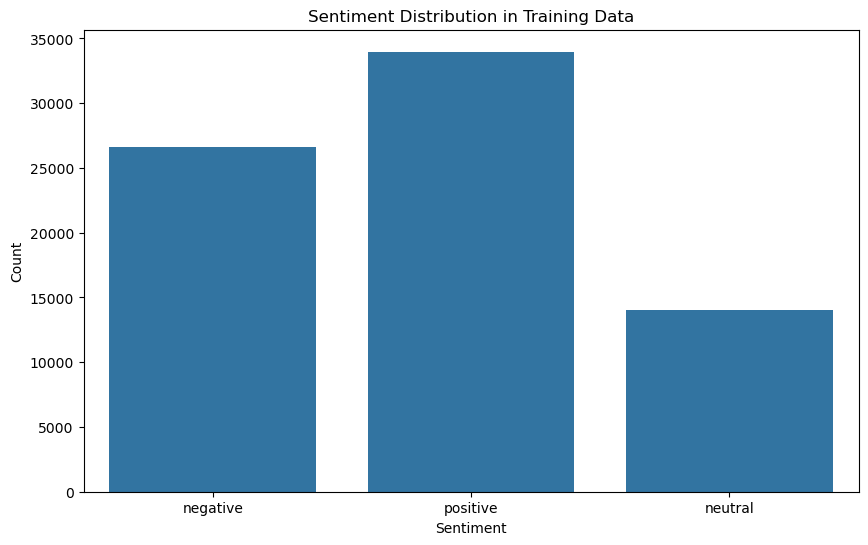

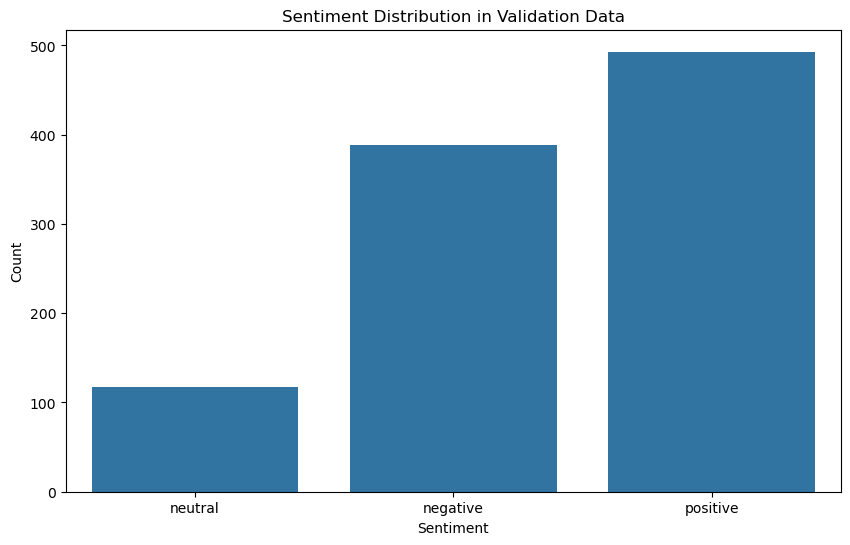

In [22]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load the data
train_data_path = 'twitter_training.csv'
validation_data_path = 'twitter_validation.csv'

# Load datasets
train_data = pd.read_csv(train_data_path)
validation_data = pd.read_csv(validation_data_path)

# Print the first few rows to understand the structure of the dataset
print("Training data sample:")
print(train_data.head())

print("Validation data sample:")
print(validation_data.head())

# Identify the correct column for text data (assuming it's the fourth column)
train_text_column = train_data.columns[3]
validation_text_column = validation_data.columns[3]

# Replace non-string entries with empty strings
train_data[train_text_column] = train_data[train_text_column].astype(str)
validation_data[validation_text_column] = validation_data[validation_text_column].astype(str)

# Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Apply preprocessing to the text column
train_data['processed_text'] = train_data[train_text_column].apply(preprocess_text)
validation_data['processed_text'] = validation_data[validation_text_column].apply(preprocess_text)

# Display the processed text
print("Processed training data:")
print(train_data[['processed_text']].head())

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the processed text
train_data['sentiment'] = train_data['processed_text'].apply(analyze_sentiment)
validation_data['sentiment'] = validation_data['processed_text'].apply(analyze_sentiment)

# Display the sentiment analysis results
print("Training data with sentiments:")
print(train_data[['processed_text', 'sentiment']].head())

# Plot sentiment distribution in training data
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=train_data)
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot sentiment distribution in validation data
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=validation_data)
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()